In [9]:
from IPython import display
from ipywidgets import widgets


In [2]:
#CLICK ME
from fastai.vision.all import *
path  = untar_data(URLs.PETS)/'images'

KeyboardInterrupt: ignored

In [3]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct = 0.2, seed =42,
    label_func = is_cat, item_tfms = Resize(224)
)



In [4]:
learn = vision_learner(dls, resnet34, metrics  = error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,error_rate,time
0,0.165198,0.022312,0.008119,01:06


epoch,train_loss,valid_loss,error_rate,time
0,0.052397,0.021489,0.004736,01:00


In [13]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

is it a cat: False
probability of being a cat is : 0.000000


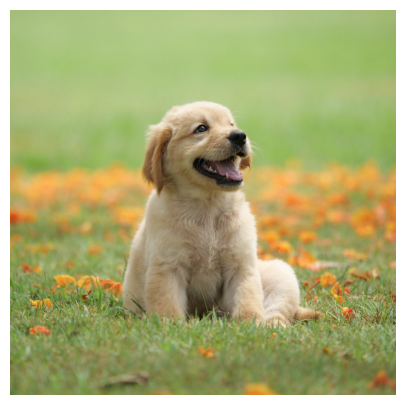

In [16]:

img = PILImage.create(uploader.data[0])
img.show()
is_cat,_,probs = learn.predict(img)
print(f'is it a cat: {is_cat}')
print(f'probability of being a cat is : {probs[1].item():.6f}')

In [4]:
from fastai.vision.all import *
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs = 8, fnames = get_image_files(path/'images'),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt',dtype=str)
)


In [5]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 144MB/s]


epoch,train_loss,valid_loss,time
0,2.928803,2.267127,00:10


epoch,train_loss,valid_loss,time
0,1.914954,1.592898,00:01
1,1.657520,1.269320,00:01
2,1.473674,1.460688,00:01
3,1.370944,1.137498,00:01
4,1.260818,0.956252,00:01
5,1.148986,0.838507,00:01
6,1.053371,0.785954,00:01
7,0.975796,0.783617,00:01


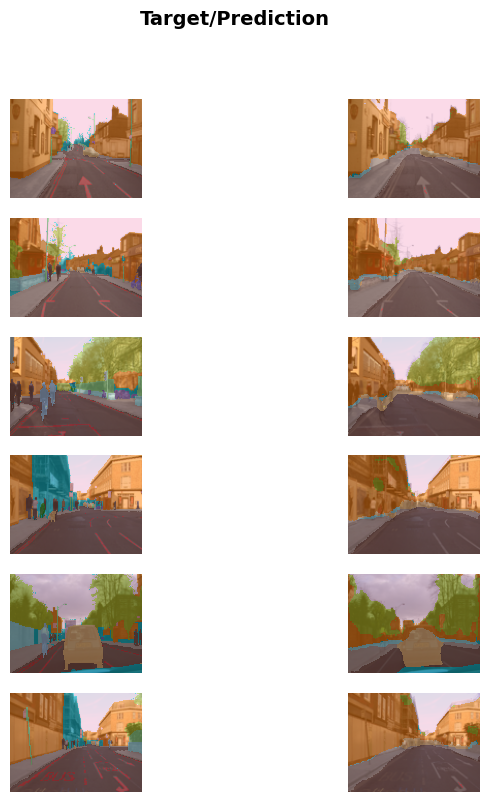

In [8]:
learn.show_results(max_n=6,figsize=(8,9))

In [9]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid="test")

learn = text_classifier_learner(dls, AWD_LSTM, drop_mult = 0.5, metrics= accuracy)

In [10]:
learn.fine_tune(4,0.01)

epoch,train_loss,valid_loss,accuracy,time
0,0.456907,0.421843,0.806680,03:22


epoch,train_loss,valid_loss,accuracy,time
0,0.317927,0.246508,0.903320,06:56
1,0.241819,0.236654,0.903400,06:55
2,0.192474,0.184944,0.929720,06:55
3,0.156675,0.192979,0.928760,06:56


In [14]:
learn.predict("awesome movie ")

('pos', tensor(1), tensor([0.0958, 0.9042]))